In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load match details dataset

In [2]:
match_details = pd.read_csv("C:\\Users\\Bala Vignesh.A\\Downloads\\IPL_ball_by_ball_updated till 2024.csv", low_memory=False)

In [3]:
print("Match Details:\n", match_details.head(), "\n")

Match Details:
    Match id        Date   Season           Batting team  \
0    335982  18-04-2008  2007/08  Kolkata Knight Riders   
1    335982  18-04-2008  2007/08  Kolkata Knight Riders   
2    335982  18-04-2008  2007/08  Kolkata Knight Riders   
3    335982  18-04-2008  2007/08  Kolkata Knight Riders   
4    335982  18-04-2008  2007/08  Kolkata Knight Riders   

                  Bowling team  Innings No  Ball No   Bowler      Striker  \
0  Royal Challengers Bangalore           1      0.1  P Kumar   SC Ganguly   
1  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
2  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
3  Royal Challengers Bangalore           1      0.3  P Kumar  BB McCullum   
4  Royal Challengers Bangalore           1      0.4  P Kumar  BB McCullum   

   Non Striker  runs_scored  extras type of extras  score score/wicket  \
0  BB McCullum            0       1        legbyes      1          1/0   
1   SC Ganguly    

In [4]:
player_salary = pd.read_excel("C:\\Users\\Bala Vignesh.A\\Downloads\IPL SALARIES 2024.xlsx")

In [5]:
print("Player Salary:\n", player_salary.head(), "\n")

Player Salary:
            Player      Salary   Rs  international  iconic
0  Abhishek Porel     20 lakh   20              0     NaN
1   Anrich Nortje   6.5 crore  650              1     NaN
2      Axar Patel     9 crore  900              0     NaN
3    David Warner  6.25 crore  625              1     NaN
4   Ishant Sharma     50 lakh   50              0     NaN 



# Filter data for the last three years (assuming the dataset includes a 'Date' column)

In [9]:
match_details['Date'] = pd.to_datetime(match_details['Date'], format='%d-%m-%Y')

In [28]:
last_three_years = match_details[match_details['Date'] >= '2024-12-01']

In [30]:
print("Match Details for the Last Three Years:\n", last_three_years.head(1000), "\n")

Match Details for the Last Three Years:
 Empty DataFrame
Columns: [Match id, Date, Season, Batting team, Bowling team, Innings No, Ball No, Bowler, Striker, Non Striker, runs_scored, extras, type of extras, score, score/wicket, wicket_confirmation, wicket_type, fielders_involved, Player Out]
Index: [] 



In [31]:
last_three_years = match_details[match_details['Date'] >= '2023-01-01']

In [25]:
print("Match Details for the Last Three Years:\n", last_three_years.head(1000), "\n")

Match Details for the Last Three Years:
         Match id       Date Season         Batting team  \
225954   1359475 2023-03-31   2023  Chennai Super Kings   
225955   1359475 2023-03-31   2023  Chennai Super Kings   
225956   1359475 2023-03-31   2023  Chennai Super Kings   
225957   1359475 2023-03-31   2023  Chennai Super Kings   
225958   1359475 2023-03-31   2023  Chennai Super Kings   
...          ...        ...    ...                  ...   
226949   1359479 2023-04-02   2023       Mumbai Indians   
226950   1359479 2023-04-02   2023       Mumbai Indians   
226951   1359479 2023-04-02   2023       Mumbai Indians   
226952   1359479 2023-04-02   2023       Mumbai Indians   
226953   1359479 2023-04-02   2023       Mumbai Indians   

                       Bowling team  Innings No  Ball No          Bowler  \
225954               Gujarat Titans           1      0.1  Mohammed Shami   
225955               Gujarat Titans           1      0.2  Mohammed Shami   
225956               G

In [26]:
last_three_years = match_details[match_details['Date'] >= '2022-01-01']

In [27]:
print("Match Details for the Last Three Years:\n", last_three_years.head(1000), "\n")

Match Details for the Last Three Years:
         Match id       Date Season         Batting team  \
208042   1304047 2022-03-26   2022  Chennai Super Kings   
208043   1304047 2022-03-26   2022  Chennai Super Kings   
208044   1304047 2022-03-26   2022  Chennai Super Kings   
208045   1304047 2022-03-26   2022  Chennai Super Kings   
208046   1304047 2022-03-26   2022  Chennai Super Kings   
...          ...        ...    ...                  ...   
209037   1304051 2022-03-29   2022     Rajasthan Royals   
209038   1304051 2022-03-29   2022     Rajasthan Royals   
209039   1304051 2022-03-29   2022     Rajasthan Royals   
209040   1304051 2022-03-29   2022     Rajasthan Royals   
209041   1304051 2022-03-29   2022     Rajasthan Royals   

                 Bowling team  Innings No  Ball No       Bowler     Striker  \
208042  Kolkata Knight Riders           1      0.0     UT Yadav  RD Gaikwad   
208043  Kolkata Knight Riders           1      0.1     UT Yadav  RD Gaikwad   
208044  Kolka

# Aggregate performance metrics for each player

In [32]:
performance = last_three_years.groupby('Striker').agg({
    'runs_scored': 'sum',
    'Ball No': 'count'
}).reset_index()

In [33]:
performance.columns = ['Player', 'Total_Runs', 'Balls_Faced']

In [34]:
print(performance.head())

          Player  Total_Runs  Balls_Faced
0       A Badoni         375          302
1      A Manohar         123          102
2       A Mishra          19           30
3       A Nortje          41           38
4  A Raghuvanshi         118           74


# Clean and transform salary data

In [44]:
data = {
    'Player': [
        'Abhishek Porel', 'Anrich Nortje', 'Axar Patel', 'David Warner', 'Ishant Sharma',
        'Kuldeep Yadav', 'Lalit Yadav', 'Lungi Ngidi', 'Mitchell Marsh', 'Mukesh Kumar',
        'Pravin Dubey', 'Prithvi Shaw', 'Rishabh Pant', 'Khaleel Ahmed', 'Vicky Ostwal',
        'Yash Dhull', 'Ajay Mandal', 'Ajinkya Rahane', 'Deepak Chahar', 'Devon Conway',
        'Maheesh Theekshana', 'Matheesha Pathirana', 'Mitchell Santner', 'Moeen Ali',
        'MS Dhoni', 'Mukesh Choudhary', 'Nishant Sindhu', 'Prashant Solanki',
        'Rajvardhan Hangargekar', 'Ravindra Jadeja', 'Ruturaj Gaikwad', 'Shaik Rasheed',
        'Shivam Dube', 'Simarjeet Singh', 'Tushar Deshpande', 'Abhinav Sadarangani',
        'B. Sai Sudharsan', 'Darshan Nalkande', 'David Miller', 'Jayant Yadav',
        'Joshua Little', 'Kane Williamson', 'Matthew Wade', 'Mohammad Shami', 'Mohit Sharma',
        'Noor Ahmad', 'R. Sai Kishore', 'Rahul Tewatia', 'Rashid Khan', 'Shubman Gill',
        'Vijay Shankar', 'Shreyas Iyer', 'Nitish Rana', 'Venkatesh Iyer', 'Andre Russell',
        'Sunil Narine', 'Harshit Rana', 'Varun Chakravarthy', 'Anukul Roy', 'Rinku Singh',
        'Rahmanullah Gurbaz', 'Amit Mishra', 'Ayush Badoni', 'Deepak Hooda', 'Devdutt Padikkal (T)',
        'K. Gowtham', 'KL Rahul', 'Krunal Pandya', 'Kyle Mayers', 'Marcus Stoinis',
        'Mark Wood', 'Mayank Yadav', 'Mohsin Khan', 'Naveen Ul Haq', 'Nicholas Pooran',
        'Prerak Mankad', 'Quinton De Kock', 'Ravi Bishnoi', 'Yash Thakur', 'Akash Madhwal',
        'Arjun Tendulkar', 'Dewald Brevis', 'Ishan Kishan', 'Hardik Pandya (T)', 'Jason Behrendorff',
        'Jasprit Bumrah', 'Kumar Kartikeya Singh', 'Tilak Varma', 'Nehal Wadhera',
        'Piyush Chawla', 'Rohit Sharma', 'Romario Shepherd (T)', 'Shams Mulani', 'Surya Kumar Yadav',
        'Tim David', 'Vishnu Vinod', 'Arshdeep Singh', 'Atharva Taide', 'Harpreet  Brar',
        'Harpreet Bhatia', 'Jitesh Sharma', 'Jonny Bairstow', 'Kagiso Rabada', 'Liam Livingstone',
        'Nathan Ellis', 'Prabhsimran Singh', 'Rahul Chahar', 'Rishi Dhawan', 'Sam Curran',
        'Shikhar Dhawan', 'Shivam  Singh', 'Sikandar Raza', 'Vidwath Kaverappa', 'Adam Zampa',
        'Avesh Khan (T)', 'Dhruv Jurel', 'Donovan Ferreira', 'Jos Buttler', 'Kuldeep  Sen',
        'Kunal Rathore', 'Navdeep Saini', 'Prasidh Krishna', 'R. Ashwin', 'Riyan Parag',
        'Sandeep Sharma', 'Sanju Samson', 'Shimron Hetmyer', 'Trent Boult', 'Yashaswi Jaiswal',
        'Yuzvendra Chahal', 'Akash Deep', 'Anuj Rawat', 'Dinesh  Karthik', 'Faf Du Plessis',
        'Glenn Maxwell', 'Himanshu Sharma', 'Karn Sharma', 'Mahipal Lomror', 'Manoj Bhandage',
        'Mayank Dagar (T)', 'Mohammed Siraj', 'Rajan Kumar', 'Rajat Patidar', 'Virat Kohli',
        'Vyshak Vijay Kumar', 'Will Jacks', 'Cameron Green (T)', 'Abdul Samad', 'Abhishek Sharma',
        'Aiden Markram', 'Anmolpreet Singh', 'Bhuvneshwar Kumar', 'Fazalhaq Farooqi',
        'Glenn Phillips', 'Heinrich Klaasen', 'Marco Jansen', 'Mayank Agarwal', 'Mayank Markande',
        'Nitish Kumar Reddy', 'Rahul Tripathi', 'Sanvir  Singh', 'Shahbaz Ahamad (T)', 'T. Natarajan',
        'Umran Malik', 'Upendra Singh Yadav', 'Washington Sundar'
    ],
    'Salary': [
        '20 lakh', '6.5 crore', '9 crore', '6.25 crore', '50 lakh', '2 crore', '65 lakh', '5 crore', '6.5 crore', '5.5 crore',
        '50 lakh', '7.5 crore', '16 crore', '5.25 crore', '20 lakh', '50 lakh', '20 lakh', '50 lakh', '14 crore', '1 crore',
        '70 lakh', '20 lakh', '1.9 crore', '8 crore', '12 crore', '20 lakh', '60 lakh', '1.2 crore', '1.5 crore', '16 crore',
        '6 crore', '20 lakh', '4 crore', '20 lakh', '20 lakh', '2.6 crore', '20 lakh', '20 lakh', '3 crore', '1.7 crore',
        '4.4 crore', '2 crore', '2.4 crore', '6.25 crore', '50 lakhs', '30 lakh', '3 crore', '9 crore', '15 crore', '7 crore',
        '1.4 crore', '12.25 crore', '8 crore', '8 crore', '12 crore', '6 crore', '20 lakh', '8 crore', '20 lakh', '55 lakh',
        '50 lakh', '50 lakh', '20 lakh', '5.75 crore', '7.75 crore', '90 lakh', '17 crore', '8.25 crore', '50 lakh', '9.2 crore',
        '7.5 crore', '20 lakh', '20 lakh', '50 lakh', '16 crore', '20 lakh', '6.75 Crore', '4 crore', '45 lakh', '20 lakh',
        '30 lakh', '3 crore', '15.25 crore', '15 crore', '50 lakh', '12 crore', '20 lakh', '1.70 crore', '20 lakh', '50 lakh',
        '16 Crore', '50 lakh', '20 lakh', '8 crore', '8.25 Crore', '20 lakh', '4 crore', '20 lakh', '3.8 crore', '40 lakh',
        '20 lakh', '6.75 crore', '9.25 crore', '11.5 crore', '75 lakh', '60 lakh', '5.25 crore', '55 lakh', '18.50 crore',
        '8.25 crore', '20 lakh', '50 lakh', '20 lakh', '1.5 crore', '10 crore', '20 lakh', '50 lakh', '10 crore', '20 lakh',
        '20 lakh', '2.6 crore', '10 crore', '5 crore', '3.8 crore', '50 lakh', '14 crore', '8.5 crore', '8 crore', '4 crore',
        '6.5 crore', '20 lakh', '3.4 crore', '5.5 crore', '7 crore', '11 crore', '20 lakh', '50 lakh', '95 lakh', '20 lakh',
        '1.8 crore', '7 crore', '70 lakh', '20 lakh', '15 crore', '20 lakh', '3.2 crore', '17.5 crore', '4 crore', '6.5 crore',
        '2.6 crore', '20 lakh', '4.2 crore', '50 lakh', '1.5 crore', '5.25 crore', '4.2 crore', '8.25 crore', '50 lakh',
        '20 lakh', '8.5 crore', '20 lakh', '2.4 crore', '3.2 crore', '4 crore', '25 lakh', '8.75 crore'
    ]
}



In [43]:
player_salary = pd.DataFrame(data)

In [55]:
player_salary['Salary'] = player_salary['Salary'].str.replace('s', '').str.strip()

In [60]:
def convert_salary(salary):
    salary = salary.replace(',', '')
    if 'lakh' in salary.lower():
        value = float(salary.replace(' lakh', '').replace(' ', ''))
        return int(value * 100000)
    elif 'crore' in salary.lower():
        value = float(salary.lower().replace('crore', '').replace(' ', ''))
        return int(value * 10000000)
    else:
        return int(float(salary))

In [61]:
player_salary['Salary'] = player_salary['Salary'].apply(convert_salary)

In [155]:
merged_data = pd.merge(performance, player_salary, on='Player')

In [156]:
merged_data = merged_data[['Player', 'Total_Runs', 'Balls_Faced', 'Salary']]

In [157]:
print(merged_data.head(10000))

                Player  Total_Runs  Balls_Faced     Salary
0          Abdul Samad         317          213   40000000
1      Abhishek Sharma         529          312   65000000
2           Akash Deep          19           10    2000000
3        Akash Madhwal           4            5    2000000
4     Anmolpreet Singh         105           84    2000000
5           Anuj Rawat         189          152   34000000
6      Arjun Tendulkar          13            9    3000000
7       Arshdeep Singh           2            2   40000000
8        Atharva Taide         201          150    2000000
9          Dhruv Jurel         254          171    2000000
10    Fazalhaq Farooqi           1            5    5000000
11        Harshit Rana           0            1    2000000
12        Ishan Kishan         698          493  152500000
13            KL Rahul         680          544  170000000
14       Kuldeep Yadav          67           81   20000000
15         Lalit Yadav          76           74    65000

# Is there a significant relationship between Total_Runs and Salary?
# Does an increase in Balls_Faced lead to an increase in Salary?
# How much of the variation in Salary can be explained by the combination of Total_Runs and Balls_Faced?

# Correlation Analysis


In [96]:
import numpy as np


In [118]:
df = pd.DataFrame({
    'Total_Runs': [317, 529, 19, 4, 105, 189, 13, 2, 201, 254, 1, 0, 698, 680, 67, 76, 214, 13, 2, 7, 227, 214, 20, 2, 1210, 182, 686, 19, 37, 60],
    'Balls_Faced': [213, 312, 10, 5, 84, 152, 9, 2, 150, 171, 5, 1, 493, 544, 81, 74, 119, 11, 8, 12, 178, 127, 29, 7, 811, 143, 459, 8, 32, 63],
    'Salary': [40000000, 65000000, 2000000, 2000000, 2000000, 34000000, 3000000, 40000000, 2000000, 2000000, 5000000, 2000000, 152500000, 170000000, 20000000, 6500000, 120000000, 70000000, 2000000, 55000000, 5000000, 150000000, 40000000, 5000000, 70000000, 5000000,17000000,40000000,2000000, 87500000]
})

In [119]:
corr_matrix = df.corr()
print(corr_matrix)

             Total_Runs  Balls_Faced    Salary
Total_Runs     1.000000     0.993819  0.473981
Balls_Faced    0.993819     1.000000  0.484123
Salary         0.473981     0.484123  1.000000


# Regression Analysis

In [139]:
X = df[['Balls_Faced','Total_Runs']]
y = df['Salary']


In [140]:
print(X.shape)  
print(y.shape)  

(30, 2)
(30,)


In [141]:
model = LinearRegression()

In [142]:
X = sm.add_constant(X)  

In [143]:
model = sm.OLS(y, X).fit()

In [144]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     4.229
Date:                Fri, 21 Jun 2024   Prob (F-statistic):             0.0253
Time:                        23:21:12   Log-Likelihood:                -569.87
No. Observations:                  30   AIC:                             1146.
Df Residuals:                      27   BIC:                             1150.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.195e+07   1.05e+07      2.085      

In [5]:
import pandas as pd

In [17]:
df = pd.DataFrame({
    'Total_Runs': [317, 529, 19, 4, 105, 189, 13, 2, 201, 254, 1, 0, 698, 680, 67, 76, 214, 13, 2, 7, 227, 214, 20, 2, 1210, 182, 686, 19, 37, 60],
    'Balls_Faced': [213, 312, 10, 5, 84, 152, 9, 2, 150, 171, 5, 1, 493, 544, 81, 74, 119, 11, 8, 12, 178, 127, 29, 7, 811, 143, 459, 8, 32, 63],
    'Salary': [40000000, 65000000, 2000000, 2000000, 2000000, 34000000, 3000000, 40000000, 2000000, 2000000, 5000000, 2000000, 152500000, 170000000, 20000000, 6500000, 120000000, 70000000, 2000000, 55000000, 5000000, 150000000, 40000000, 5000000, 70000000, 5000000,17000000,40000000,2000000, 87500000]
})

# Plot the scatterplot with regression line

In [24]:
X = df[['Balls_Faced', 'Total_Runs']]
y = df['Salary']

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr_model = LinearRegression()

In [29]:
lr_model.fit(X, y) 

LinearRegression()

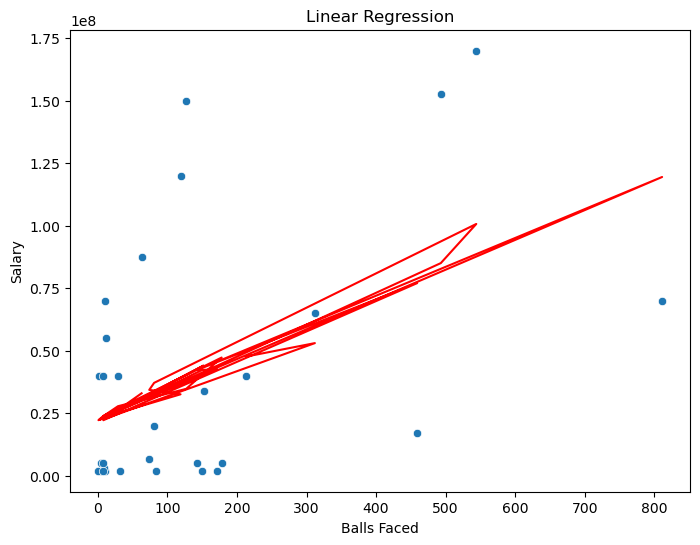

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Balls_Faced", y="Salary", data=df)
plt.plot(df["Balls_Faced"], lr_model.predict(X), "r")
plt.xlabel("Balls Faced")
plt.ylabel("Salary")
plt.title("Linear Regression")
plt.show()

# Plot the 3D scatterplot

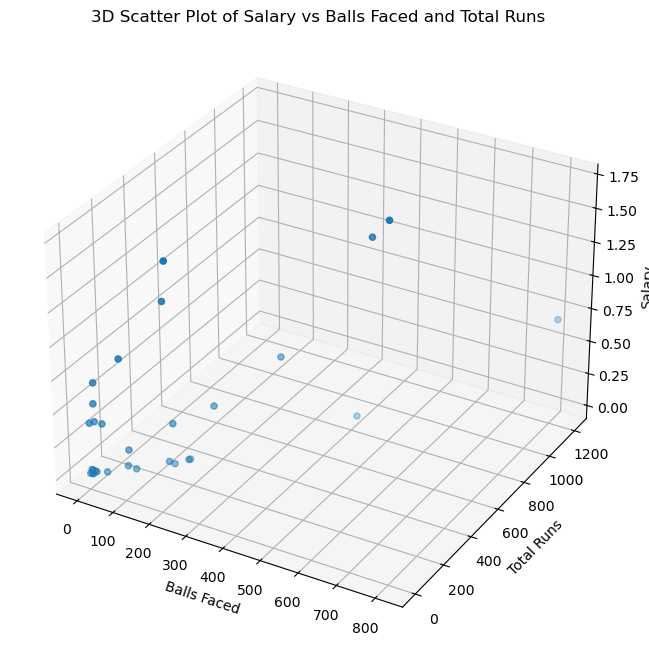

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Balls_Faced'], X['Total_Runs'], y)
ax.set_xlabel('Balls Faced')
ax.set_ylabel('Total Runs')
ax.set_zlabel('Salary')
plt.title("3D Scatter Plot of Salary vs Balls Faced and Total Runs")
plt.show()